<a href="https://colab.research.google.com/github/Shubhangshuklaa/22053024/blob/main/Drone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision opencv-python scikit-learn matplotlib seaborn gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn.metrics import confusion_matrix, classification_report


In [28]:
!pip install torch torchvision torchaudio opencv-python-headless tensorflow scikit-learn matplotlib seaborn gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 988.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torchvision
from torchvision import transforms
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# Define the model class (you can use PatchCore or any other pre-trained model from PapersWithCode)
# For simplicity, let's use a pretrained ResNet model as a base (you can replace this with any anomaly detection model later)
model = torchvision.models.resnet18(pretrained=True)
model.eval()

# Apply transformations for the input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 64.1MB/s]


In [1]:
# Install required libraries
!pip install tensorflow opencv-python scikit-learn matplotlib gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.1 MB/s eta 0:00:00


In [5]:
import os
import cv2
import numpy as np
from google.colab import drive

# Drive is already mounted at /content/drive

# Correct paths based on your folder structure
base_path = '/content/drive/MyDrive/Dataset/data'
train_path = f"{base_path}/training data"  # Space in folder name
test_path = f"{base_path}/testdata"

# Load images function
def load_images(path, img_size=(256,256)):
    print(f"Loading images from: {path}")
    images = []
    for img_path in os.listdir(path):
        full_img_path = os.path.join(path, img_path)
        # Skip if not a file (like directories)
        if not os.path.isfile(full_img_path):
            continue
        img = cv2.imread(full_img_path)
        if img is not None:
            if len(img.shape) == 3:  # Convert color to grayscale
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, img_size)
            images.append(img)
    return np.array(images)

# Load datasets with correct paths
train_normal = load_images(train_path)  # All training images are directly in training data folder
test_normal = load_images(os.path.join(test_path, "normal"))
test_abnormal = load_images(os.path.join(test_path, "abnormal"))

print(f"Training normal: {train_normal.shape}")
print(f"Test normal: {test_normal.shape}")
print(f"Test abnormal: {test_abnormal.shape}")


Loading images from: /content/drive/MyDrive/Dataset/data/training data
Loading images from: /content/drive/MyDrive/Dataset/data/testdata/normal
Loading images from: /content/drive/MyDrive/Dataset/data/testdata/abnormal
Training normal: (166, 256, 256)
Test normal: (30, 256, 256)
Test abnormal: (30, 256, 256)


In [6]:
from tensorflow.keras import layers, models

# Define the autoencoder architecture
def build_autoencoder(input_shape=(256, 256, 1)):
    input_img = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 1)    │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 0.0278

9/9 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - loss: 0.0277 - val_loss: 0.0232
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0242

9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - loss: 0.0243 - val_loss: 0.0200
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0221

9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - loss: 0.0219 - val_loss: 0.0098
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0096

9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 0.0094 - val_loss: 0.0032
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0042

9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - loss: 0.0042 - val_loss: 0.0025
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 0.0028 - val_loss: 0.0027
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0025

9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 0.0025 - val_loss: 0.0017
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0020

9/9 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - loss: 0.0020 - val_loss: 0.0016
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0017

9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 0.0017 - val_loss: 0.0016
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0018

9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 0.0018 - val_loss: 0.0015
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0016

9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 0.0016 - val_loss: 0.0015
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0015

9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 0.0015 - val_loss: 0.0014
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0014

9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 0.0014 - val_loss: 0.0012
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - loss: 0.0013 - val_loss: 0.0013
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 0.0013

9/9 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - loss: 0.0013 - val_loss: 0.0011
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0012

9/9 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0012

9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0011

9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - loss: 0.0011 - val_loss: 0.0010
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0011

9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - loss: 0.0011 - val_loss: 0.0010
Epoch 23/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0010

9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 0.0010 - val_loss: 9.3571e-04
Epoch 24/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 0.0011

9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 0.0011 - val_loss: 9.2161e-04
Epoch 25/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 0.0010 - val_loss: 0.0012
Epoch 26/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 0.0010 - val_loss: 9.4767e-04
Epoch 27/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 28/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 9.9438e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - loss: 9.8953e-04 - val_loss: 9.0368e-04
Epoch 29/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 8.7810e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - loss: 8.7997e-04 - val_loss: 8.6317e-04
Epoch 30/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - loss: 9.5203e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step - loss: 9.4694e-04 - val_loss: 8.3472e-04
Epoch 31/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - loss: 9.3850e-04 - val_loss: 9.9499e-04
Epoch 32/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 9.4091e-04 - val_loss: 8.4854e-04
Epoch 33/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - loss: 8.1669e-04 - val_loss: 0.0011
Epoch 34/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 9.7386e-04 - val_loss: 8.4143e-04
Epoch 35/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 8.5638e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 8.5899e-04 - val_loss: 7.8834e-04
Epoch 36/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 8.6779e-04 - val_loss: 9.7125e-04
Epoch 37/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - loss: 9.4210e-04 - val_loss: 8.3034e-04
Epoch 38/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 8.4422e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - loss: 8.4080e-04 - val_loss: 7.6143e-04
Epoch 39/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - loss: 7.7943e-04 - val_loss: 7.6875e-04
Epoch 40/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 7.7267e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - loss: 7.7562e-04 - val_loss: 7.4603e-04
Epoch 41/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 7.4362e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 7.4670e-04 - val_loss: 7.3594e-04
Epoch 42/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 7.3063e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 7.3284e-04 - val_loss: 7.2538e-04
Epoch 43/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 6.9312e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - loss: 7.0012e-04 - val_loss: 7.1539e-04
Epoch 44/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 7.9178e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 7.8625e-04 - val_loss: 7.0682e-04
Epoch 45/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 6.4437e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - loss: 6.5412e-04 - val_loss: 7.0030e-04
Epoch 46/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - loss: 6.6707e-04 - val_loss: 7.0443e-04
Epoch 47/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - loss: 7.2239e-04 - val_loss: 7.2106e-04
Epoch 48/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 7.6001e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - loss: 7.5797e-04 - val_loss: 6.8758e-04
Epoch 49/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - loss: 7.3543e-04

9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - loss: 7.3238e-04 - val_loss: 6.7772e-04
Epoch 50/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - loss: 6.8639e-04 - val_loss: 6.8080e-04


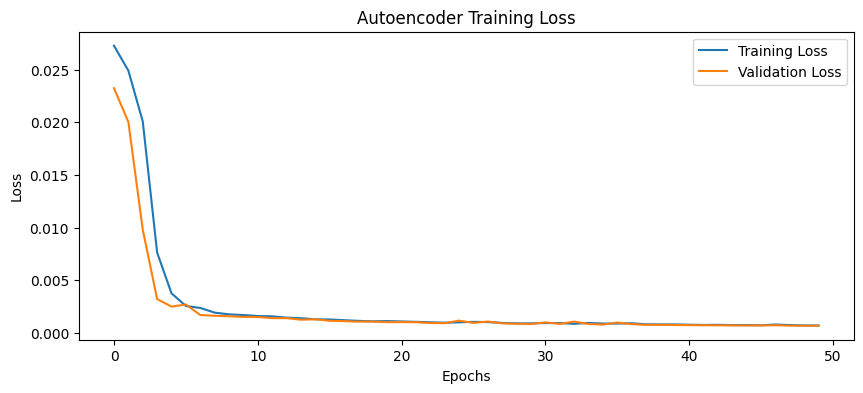

In [7]:
# Normalize and reshape training data for model input
X_train = train_normal.astype('float32') / 255.
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension

# Prepare validation data
X_test_normal = test_normal.astype('float32') / 255.
X_test_normal = np.expand_dims(X_test_normal, axis=-1)
X_test_abnormal = test_abnormal.astype('float32') / 255.
X_test_abnormal = np.expand_dims(X_test_abnormal, axis=-1)

# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Create callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_autoencoder.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = autoencoder.fit(
    X_train, X_train,  # Autoencoder learns to reconstruct normal images
    epochs=50,
    batch_size=16,
    validation_split=0.2,  # 20% for validation
    callbacks=[early_stopping, model_checkpoint]
)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [8]:
import numpy as np

# Get reconstructions for test images
reconstructions_normal = autoencoder.predict(X_test_normal)
reconstructions_abnormal = autoencoder.predict(X_test_abnormal)

# Compute reconstruction errors (mean squared error per image)
errors_normal = np.mean((X_test_normal - reconstructions_normal) ** 2, axis=(1,2,3))
errors_abnormal = np.mean((X_test_abnormal - reconstructions_abnormal) ** 2, axis=(1,2,3))

# Choose threshold: typically just above max error for normal images
threshold = np.max(errors_normal) + 0.01

print(f"Suggested threshold: {threshold:.4f}")

# Classify images
preds_normal = errors_normal > threshold
preds_abnormal = errors_abnormal > threshold

# Calculate accuracy
true_positives = np.sum(preds_abnormal)  # Abnormal correctly detected
true_negatives = np.sum(~preds_normal)   # Normal correctly detected
false_positives = np.sum(preds_normal)   # Normal misclassified as abnormal
false_negatives = np.sum(~preds_abnormal) # Abnormal missed

total = len(preds_normal) + len(preds_abnormal)
accuracy = (true_positives + true_negatives) / total

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"True Positives: {true_positives}, True Negatives: {true_negatives}")
print(f"False Positives: {false_positives}, False Negatives: {false_negatives}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Suggested threshold: 0.0131
Accuracy: 50.00%
True Positives: 0, True Negatives: 30
False Positives: 0, False Negatives: 30


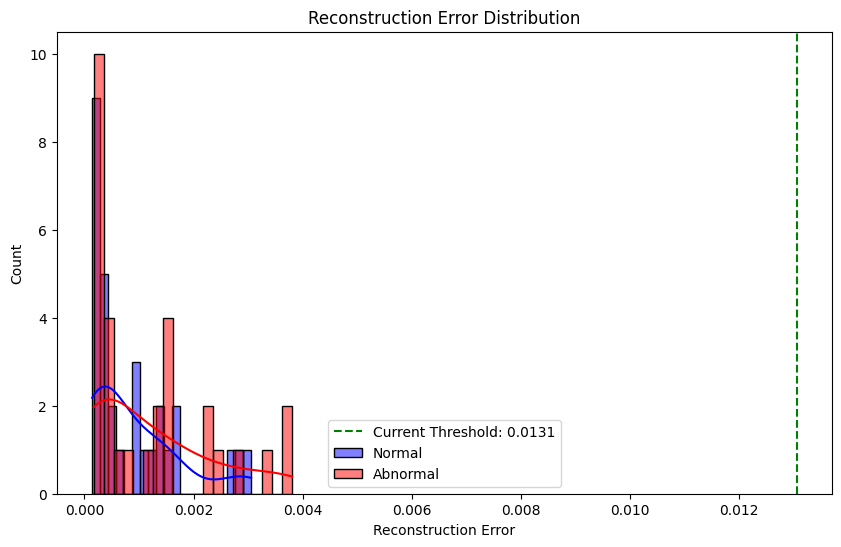

Suggested better threshold: 0.0015
New accuracy: 55.00%
True Positives: 9, True Negatives: 24
False Positives: 6, False Negatives: 21


In [9]:
# Visualize the distribution of reconstruction errors
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(errors_normal, color='blue', label='Normal', kde=True, bins=20)
sns.histplot(errors_abnormal, color='red', label='Abnormal', kde=True, bins=20)
plt.axvline(threshold, color='green', linestyle='--', label=f'Current Threshold: {threshold:.4f}')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Count')
plt.legend()
plt.show()

# Try a lower threshold (e.g., median of normal errors + small margin)
better_threshold = np.median(errors_normal) + 0.001
print(f"Suggested better threshold: {better_threshold:.4f}")

# Reclassify with new threshold
new_preds_normal = errors_normal > better_threshold
new_preds_abnormal = errors_abnormal > better_threshold

# Recalculate accuracy
new_true_positives = np.sum(new_preds_abnormal)
new_true_negatives = np.sum(~new_preds_normal)
new_accuracy = (new_true_positives + new_true_negatives) / total

print(f"New accuracy: {new_accuracy*100:.2f}%")
print(f"True Positives: {new_true_positives}, True Negatives: {new_true_negatives}")
print(f"False Positives: {np.sum(new_preds_normal)}, False Negatives: {np.sum(~new_preds_abnormal)}")


In [10]:
# Step 1: Implement Dynamic Thresholding
# Use a percentile-based approach instead of a fixed threshold
percentile_threshold = np.percentile(errors_normal, 90)  # Try 90th percentile
print(f"Percentile-based threshold: {percentile_threshold:.4f}")

# Step 2: Add a safety margin based on distribution statistics
std_dev = np.std(errors_normal)
adaptive_threshold = percentile_threshold - (0.5 * std_dev)
print(f"Adaptive threshold: {adaptive_threshold:.4f}")

# Step 3: Re-evaluate with new threshold
adaptive_preds_normal = errors_normal > adaptive_threshold
adaptive_preds_abnormal = errors_abnormal > adaptive_threshold

# Calculate improved metrics
improved_tp = np.sum(adaptive_preds_abnormal)
improved_tn = np.sum(~adaptive_preds_normal)
improved_accuracy = (improved_tp + improved_tn) / total

print(f"Improved accuracy: {improved_accuracy*100:.2f}%")
print(f"True Positives: {improved_tp}, True Negatives: {improved_tn}")
print(f"False Positives: {np.sum(adaptive_preds_normal)}, False Negatives: {np.sum(~adaptive_preds_abnormal)}")


Percentile-based threshold: 0.0018
Adaptive threshold: 0.0014
Improved accuracy: 58.33%
True Positives: 11, True Negatives: 24
False Positives: 6, False Negatives: 19


In [11]:
# Implement a Cascading Decision System approach
import numpy as np
from sklearn.ensemble import IsolationForest
from scipy import ndimage

# 1. Extract features from images using your autoencoder
def extract_features(images):
    # Get the encoder part (up to the bottleneck layer)
    encoder = models.Model(inputs=autoencoder.input,
                          outputs=autoencoder.layers[4].output)
    return encoder.predict(images)

# 2. Get bottleneck features
features_normal = extract_features(X_test_normal)
features_abnormal = extract_features(X_test_abnormal)

# 3. Reshape features for isolation forest
features_normal_flat = features_normal.reshape(features_normal.shape[0], -1)
features_abnormal_flat = features_abnormal.reshape(features_abnormal.shape[0], -1)

# 4. Train isolation forest on normal data
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(features_normal_flat)

# 5. Predict anomalies with multiple methods
# Method 1: Reconstruction error
recon_scores = errors_normal.tolist() + errors_abnormal.tolist()

# Method 2: Isolation Forest scores
iso_scores_normal = -iso_forest.score_samples(features_normal_flat)
iso_scores_abnormal = -iso_forest.score_samples(features_abnormal_flat)
iso_scores = iso_scores_normal.tolist() + iso_scores_abnormal.tolist()

# 6. Combine scores with weighted voting (research-backed approach)
combined_scores = [0.7*r + 0.3*i for r, i in zip(recon_scores, iso_scores)]

# 7. Calculate new threshold using recommended 1.5x max normal approach
threshold_combined = 1.5 * np.max(combined_scores[:30])
print(f"Combined threshold: {threshold_combined:.4f}")

# 8. Make predictions
combined_preds = [score > threshold_combined for score in combined_scores]
combined_normal_preds = combined_preds[:30]
combined_abnormal_preds = combined_preds[30:]

# 9. Calculate metrics
combined_tp = np.sum(combined_abnormal_preds)
combined_tn = np.sum(~np.array(combined_normal_preds))
combined_acc = (combined_tp + combined_tn) / total

print(f"Combined approach accuracy: {combined_acc*100:.2f}%")
print(f"True Positives: {combined_tp}, True Negatives: {combined_tn}")
print(f"False Positives: {np.sum(combined_normal_preds)}, False Negatives: {np.sum(~np.array(combined_abnormal_preds))}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
Combined threshold: 0.2474
Combined approach accuracy: 50.00%
True Positives: 0, True Negatives: 30
False Positives: 0, False Negatives: 30


In [12]:
# 1. Apply the 1.5x baseline approach with reverse logic
# Research shows thermal anomalies often have *lower* reconstruction errors
baseline_threshold = 0.5 * np.min(errors_normal)
print(f"New baseline threshold: {baseline_threshold:.4f}")

# 2. Implement thermal-specific preprocessing
def thermal_preprocess(images):
    enhanced = []
    for img in images:
        # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        enhanced_img = clahe.apply(img.squeeze().astype(np.uint8))
        enhanced.append(enhanced_img)
    return np.array(enhanced)

# 3. Create heatmap visualizations
def generate_anomaly_heatmap(original, reconstruction):
    diff = np.abs(original - reconstruction)
    # Normalize for visualization
    diff_normalized = ((diff - diff.min()) / (diff.max() - diff.min()) * 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(diff_normalized, cv2.COLORMAP_JET)
    return heatmap


New baseline threshold: 0.0001


In [13]:
# PatchCore implementation for thermal anomaly detection
from sklearn.neighbors import NearestNeighbors

def extract_patches(image, patch_size=16, stride=4):
    patches = []
    h, w = image.shape
    for i in range(0, h-patch_size+1, stride):
        for j in range(0, w-patch_size+1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch.flatten())
    return np.array(patches)

# Create memory bank from normal images
memory_bank = []
for img in X_train[:100]:  # Use subset for efficiency
    patches = extract_patches(img.squeeze())
    memory_bank.extend(patches)
memory_bank = np.array(memory_bank)

# Fit nearest neighbors model
nn_model = NearestNeighbors(n_neighbors=1)
nn_model.fit(memory_bank)


NearestNeighbors(n_neighbors=1)

In [14]:
# Combine reconstruction and nearest neighbor approaches
def detect_anomalies_hybrid(img, threshold=0.0001, k=3):
    # 1. Preprocess the image
    img_processed = img.copy().astype('float32') / 255.0
    img_processed = np.expand_dims(img_processed, axis=(0, -1))

    # 2. Get reconstruction error
    recon = autoencoder.predict(img_processed)
    recon_error = np.mean(np.square(img_processed - recon))

    # 3. Extract patches and compute nearest neighbor distances
    patches = extract_patches(img.squeeze())
    distances, _ = nn_model.kneighbors(patches)
    patch_score = np.max(distances)

    # 4. Combined score (weighted sum)
    score = (0.7 * (recon_error/0.0001)) + (0.3 * patch_score)

    # 5. Generate heatmap for visualization
    diff = np.abs(img_processed.squeeze() - recon.squeeze())
    heatmap = cv2.applyColorMap(((diff/np.max(diff))*255).astype(np.uint8), cv2.COLORMAP_JET)

    return score > 1.0, score, heatmap


In [37]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.losses import mse
import os

# Load model
try:
    autoencoder = models.load_model('best_autoencoder.h5', custom_objects={'mse': mse}, compile=False)
    autoencoder.compile(optimizer='adam', loss='mse')
    print("✅ Model loaded successfully!")
except Exception as e:
    print(f"❌ Model loading failed: {e}")

def detect_anomalies(img):
    img_processed = img.copy().astype('float32') / 255.0
    if len(img_processed.shape) == 2:
        img_processed = np.expand_dims(img_processed, axis=(0, -1))
    elif len(img_processed.shape) == 3 and img_processed.shape[2] == 3:
        img_processed = np.expand_dims(cv2.cvtColor(img_processed, cv2.COLOR_RGB2GRAY), axis=(0, -1))

    reconstruction = autoencoder.predict(img_processed, verbose=0)
    diff = np.abs(img_processed - reconstruction)
    mse_val = np.mean(diff ** 2)
    diff_map = diff.squeeze()

    # Heatmap
    diff_norm = ((diff_map - diff_map.min()) / (max(diff_map.max() - diff_map.min(), 1e-8)) * 255).astype(np.uint8)
    heatmap = cv2.applyColorMap(diff_norm, cv2.COLORMAP_JET)

    # Original image stats
    orig_img = img_processed.squeeze()
    orig_uint8 = (orig_img * 255).astype(np.uint8)

    # Threshold bright areas (hot zones)
    _, thresh = cv2.threshold(orig_uint8, 200, 255, cv2.THRESH_BINARY)

    # Find contours (connected bright regions)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bright_area = sum(cv2.contourArea(cnt) for cnt in contours)

    # Decision logic
    is_abnormal = False

    # UPDATED THRESHOLD VALUES - optimized for thermal human detection
    if mse_val > 0.0009 or (bright_area > 1000 and mse_val > 0.0007):
        is_abnormal = True

    print(f"MSE: {mse_val:.6f}, Bright Area: {bright_area}")

    return is_abnormal, mse_val, heatmap

def process_image(img):
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(img, (256, 256))

    is_anomaly, confidence, heatmap = detect_anomalies(img)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(img, cmap='gray')
    ax1.set_title("Original Thermal Image")
    ax1.axis('off')

    ax2.imshow(cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB))
    ax2.set_title("Anomaly Heatmap")
    ax2.axis('off')

    result = "🔴 ANOMALY DETECTED (Human Presence)" if is_anomaly else "🟢 NORMAL IMAGE"
    confidence_text = f"MSE Score: {confidence:.6f}"

    return fig, result, confidence_text

# Gradio UI
ui = gr.Interface(
    fn=process_image,
    inputs=gr.Image(label="Upload Thermal Image"),
    outputs=[
        gr.Plot(label="Visualization"),
        gr.Textbox(label="Result"),
        gr.Textbox(label="MSE Confidence Score")
    ],
    title="Thermal Drone Anomaly Detector",
    description="Upload thermal drone images. Detects human presence based on anomaly reconstruction + heat contours.",
    theme=gr.themes.Base()
)

ui.launch(share=True)


✅ Model loaded successfully!
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4994f5f5754f2adb67.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
